In [3]:
#import modules 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import onnxruntime as rt
import onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import to_onnx
import matplotlib.pyplot as plt

C:\Users\mmvdb\AppData\Local\Temp\ipykernel_22744\1825901989.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Import original data
data = pd.read_csv('data/synth_data_for_training.csv')
features_to_pass = data.columns.tolist()
X = data.drop('checked', axis=1)

y = data['checked']
# Import labels from models
model_1 = rt.InferenceSession("model_1.onnx")
model_2 = rt.InferenceSession("model_2.onnx")
y_pred_onnx1 =  model_1.run(None, {'X': X.values.astype(np.float32)})
#to dataframe with column 'checked'
y_pred_onnx1 = pd.DataFrame(y_pred_onnx1[0], columns=['checked'])
y_pred_onnx2 =  model_2.run(None, {'X': X.values.astype(np.float32)})
y_pred_onnx2 = pd.DataFrame(y_pred_onnx2[0], columns=['checked'])
#count the number of times a combination of persoon_leeftijd_bij_onderzoek and relatie_kind_huidige_aantal occurs


data_1 = data.copy()
data_2 = data.copy()
data_1['checked'] = y_pred_onnx1['checked']
data_2['checked'] = y_pred_onnx2['checked']

In [ ]:
# Make function that plots distribution of original data vs predictions
def plot_distribution(data, y_pred_onnx1, y_pred_onnx2, features_to_pass):
    data_1 = data.copy()
    data_2 = data.copy()
    data_1['checked'] = y_pred_onnx1['checked']
    data_2['checked'] = y_pred_onnx2['checked']
    for feature in features_to_pass:
        #if binary, make barplot
        if len(data[feature].unique()) <= 5:
            fig, axs = plt.subplots(1, 3, figsize=(11, 5), sharey=True)
            sns.countplot(data=data, x=feature, hue='checked', ax=axs[0])
            axs[0].set_title(f'original data')
            sns.countplot(data=data_1, x=feature, hue='checked', ax=axs[1])  # Specify axes for model 1
            axs[1].set_title(f'model 1')
            sns.countplot(data=data_2, x=feature, hue='checked', ax=axs[2])  # Specify axes for model 2
            axs[2].set_title(f'model 2')
            #plot difference between original data and model 1
            # Make new key 'difference' in data_1 and data_2
            # Make entry of 'difference' 1 if checked differs for model 1 and original data#
            data_1['difference'] = (data_1['checked'] != data['checked']).astype(int)
            print(data_1['difference'])
            print(data_1['checked'])
            print(data['checked'])
            data_2['difference'] = (data_2['checked'] != data['checked']).astype(int)
            fig_2, axs_2 = plt.subplots(1, 2, figsize=(10, 6), sharey=True, sharex=True)
            sns.countplot(data=data_1, x=feature, hue='difference', ax=axs_2[0])
            axs_2[0].set_title(f'difference model 1 and original data')
            sns.countplot(data=data_2, x=feature, hue='difference', ax=axs_2[1])
            axs_2[1].set_title(f'difference model 2 and original data')
            plt.show()

        else:
            #plot density of original data, model 1 and model 2
            fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharey=True, sharex=True)
            sns.kdeplot(data=data, x=feature, hue='checked', ax=axs[0])
            axs[0].set_title(f'original data')
            sns.kdeplot(data=data_1, x=feature, hue='checked', ax=axs[1])
            axs[1].set_title(f'model 1')
            sns.kdeplot(data=data_2, x=feature, hue='checked', ax=axs[2])
            axs[2].set_title(f'model 2')
            plt.show()
            #plot difference between original data and model 1
            # Make new key 'difference' in data_1 and data_2
            # Make entry of 'difference' 1 if checked differs for model 1 and original data
            data_1['difference'] = (data_1['checked'] != data['checked']).astype(int)
            data_2['difference'] = (data_2['checked'] != data['checked']).astype(int)
            fig_1, axs_1 = plt.subplots(1, 2, figsize=(10, 6), sharey=True, sharex=True)
            sns.kdeplot(data=data_1, x=feature, hue='difference', ax=axs_1[0])
            axs_1[0].set_title(f'difference model 1 and original data')
            sns.kdeplot(data=data_2, x=feature, hue='difference', ax=axs_1[1])
            axs_1[1].set_title(f'difference model 2 and original data')
            plt.show()
            
            #histplots of checked for original data, model 1 and model 2
            fig_2, axs_2 = plt.subplots(1, 3, figsize=(11, 5), sharey=True)
            sns.histplot(data=data, x=feature, hue='checked', ax=axs_2[0])
            axs_2[0].set_title(f'original data')
            sns.histplot(data=data_1, x=feature, hue='checked', ax=axs_2[1])
            axs_2[1].set_title(f'model 1')
            sns.histplot(data=data_2, x=feature, hue='checked', ax=axs_2[2])
            axs_2[2].set_title(f'model 2')
            plt.show()
            
                            
features_to_pass = ['persoon_geslacht_vrouw', 'persoon_leeftijd_bij_onderzoek', 
                    'adres_dagen_op_adres', 'typering_hist_inburgeringsbehoeftig',
                    'persoonlijke_eigenschappen_taaleis_voldaan', 'belemmering_hist_taal']

plot_distribution(data, y_pred_onnx1, y_pred_onnx2, features_to_pass)

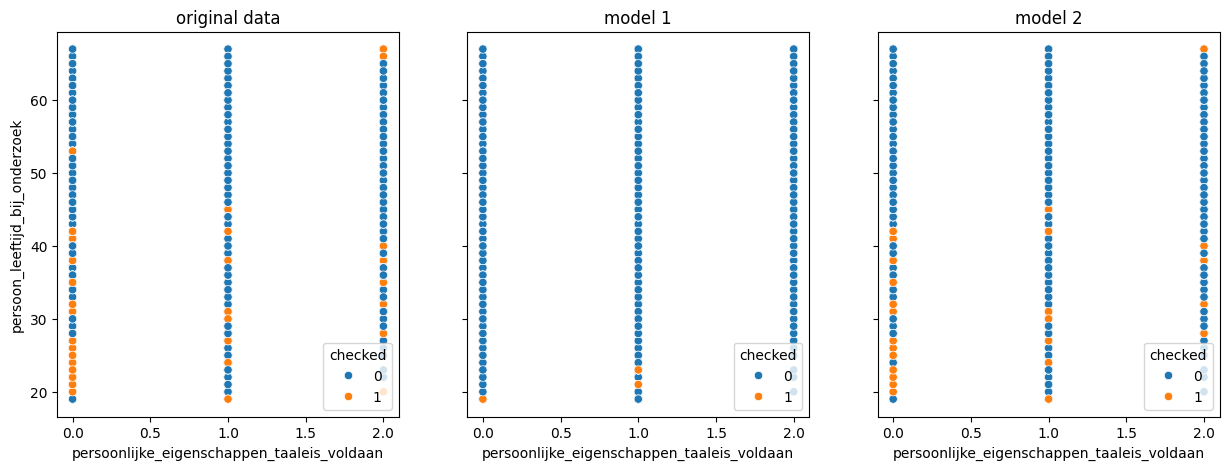

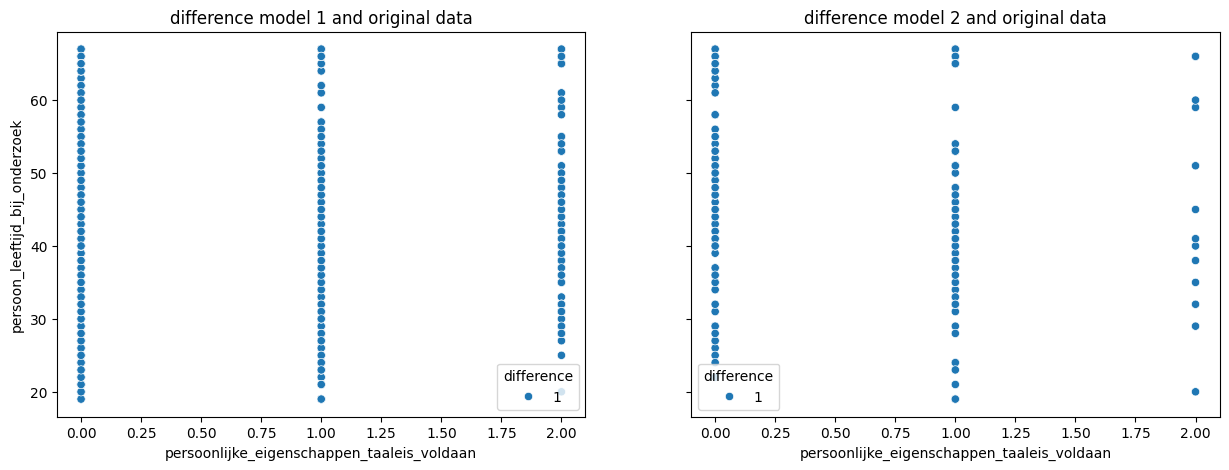

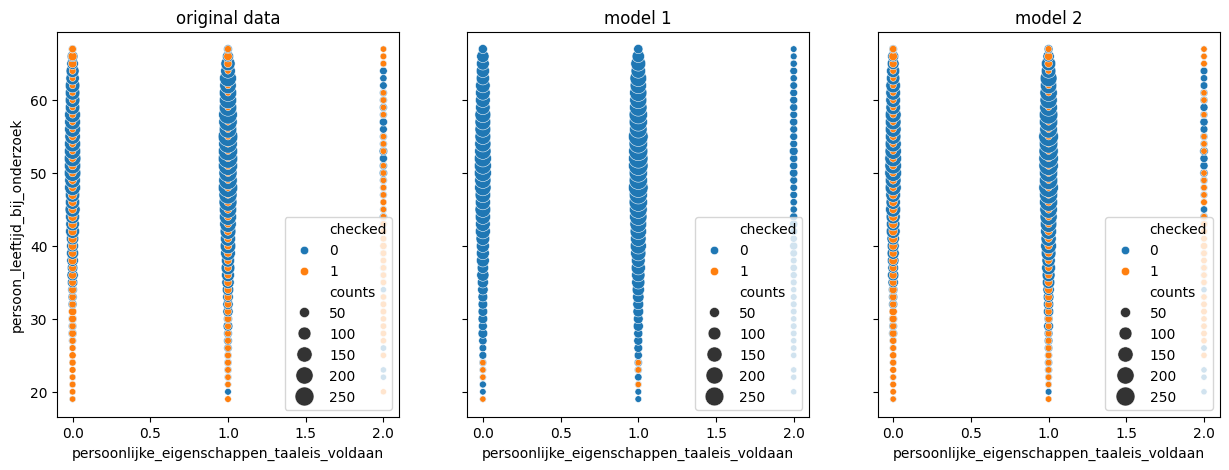

In [24]:
# function to make relplots of two models and original data for two features
def plot_relplots(data, data_1, data_2, feature1, feature2):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    #group data by feature1 and feature2 and checked 
    data_grouped = data.groupby([feature1, feature2, 'checked']).size().reset_index(name='counts')
    data_1_grouped = data_1.groupby([feature1, feature2, 'checked']).size().reset_index(name='counts')
    data_2_grouped = data_2.groupby([feature1, feature2, 'checked']).size().reset_index(name='counts')
    #make scatter plots that only shows checked = 1
    sns.scatterplot(data=data, x=feature1, y=feature2, hue = 'checked', ax=axs[0])
    axs[0].set_title(f'original data')
    sns.scatterplot(data=data_1, x=feature1, y=feature2, hue = 'checked', ax=axs[1])
    axs[1].set_title(f'model 1')
    sns.scatterplot(data=data_2, x=feature1, y=feature2, hue = 'checked', ax=axs[2])
    axs[2].set_title(f'model 2')
    plt.show()
    
    #show where they differ
    data_1['difference'] = (data_1['checked'] != data['checked']).astype(int)
    data_2['difference'] = (data_2['checked'] != data['checked']).astype(int)
    fig_1, axs_1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    sns.scatterplot(data=data_1[data_1['difference'] == 1], x=feature1, y=feature2, hue = 'difference', ax=axs_1[0])
    axs_1[0].set_title(f'difference model 1 and original data')
    sns.scatterplot(data=data_2[data_2['difference'] == 1], x=feature1, y=feature2, hue = 'difference', ax=axs_1[1])
    axs_1[1].set_title(f'difference model 2 and original data')
    plt.show()
    
    #show groupby in scatterplots
    fig_2, axs_2 = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    sns.scatterplot(data=data_grouped, x=feature1, y=feature2, size='counts', sizes=(20, 200),
                    hue = 'checked', ax=axs_2[0])
    axs_2[0].set_title(f'original data')
    sns.scatterplot(data=data_1_grouped, x=feature1, y=feature2, size='counts', sizes=(20, 200),
                    hue = 'checked', ax=axs_2[1])
    axs_2[1].set_title(f'model 1')
    sns.scatterplot(data=data_2_grouped, x=feature1, y=feature2, size='counts', sizes=(20, 200),
                    hue = 'checked', ax=axs_2[2])
    axs_2[2].set_title(f'model 2')
    plt.show()
    
    
    

plot_relplots(data, data_1, data_2, 'persoonlijke_eigenschappen_taaleis_voldaan', 'persoon_leeftijd_bij_onderzoek')